In [1]:
from lib4 import *

In [2]:
myHyper = None
# History
# x0 = [4.92463563, 4.95336686, 7.09970678] #-0.26296188908503493 61732 Best_20_48__4.9_5.0_7.1_-0.2629
# x0 = [4.92463563, 4.95336686, 7.09970678]  # -0.41013304308658216 Best_20_48__4.9_5.0_7.1_-0.4101
# x0 = [2.0943951023931953, 2.0943951023931953, 0.0]
#################################################################
# Evidence of Base Spectrum independent - Two walkabouts led to the same position
# x0 = [4.1887902047863905, 1.0471975511965976, 2.0943951023931953] # -1.3261511132450026
# x0 = [4.14376593, 1.09484514, 1.89120155]  # -1.37423412
# x0 = [4.1436085, 1.09556579, 1.94038023] - 1.3343069931542146
# x0 = [4.15976051, 1.10351324, 1.98582181] #-1.392411053733134
#################################################################
#################################################################
#################################################################
#################################################################
# Position of our Universe (error = -1.3924651085864181 for base 2:11)
x0 = [4.92463563, 4.95336686, 0.8165214728204138] #[339.46, 341.1, 104.08]
y0 = [np.round((xx+1) / np.pi * 180, 2) for xx in x0]
print(y0)
# In degrees  [339.46, 341.1, 104.08]
todo = [Color.EVALUATE_DF_AT_POSITION,Color.OPTIMIZE_SPECTRUM,Color.FINDBESTFORKRANGE, Color.MINIMIZEPOSITION,  
        Color.CREATE_GAUSSIAN_BACKGROUND, Color.CREATE_VARIABLE_R_GIF, Color.FINDNEIGHBORHOOD]


[339.46, 341.1, 104.08]


evaluated at [339.46, 341.1, 104.08]
46


0.0 180.0 -180.0 180.0


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

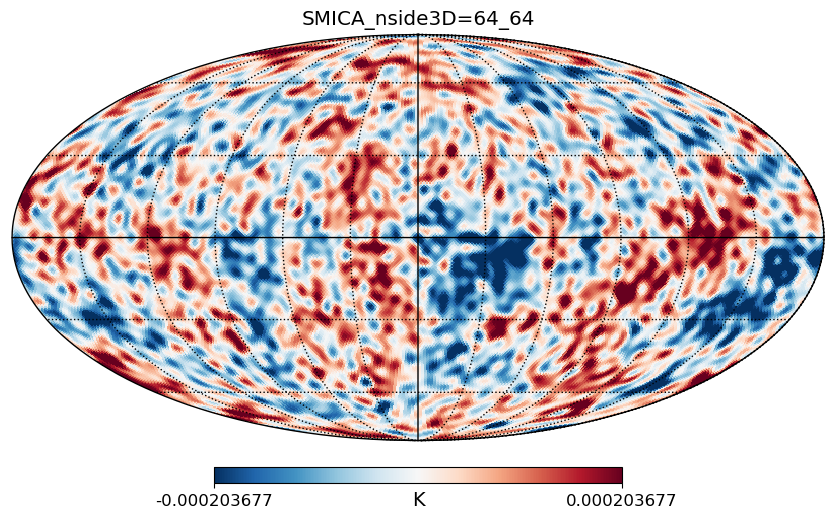

8034 8034 (8034, 49156)


0.0 180.0 -180.0 180.0


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

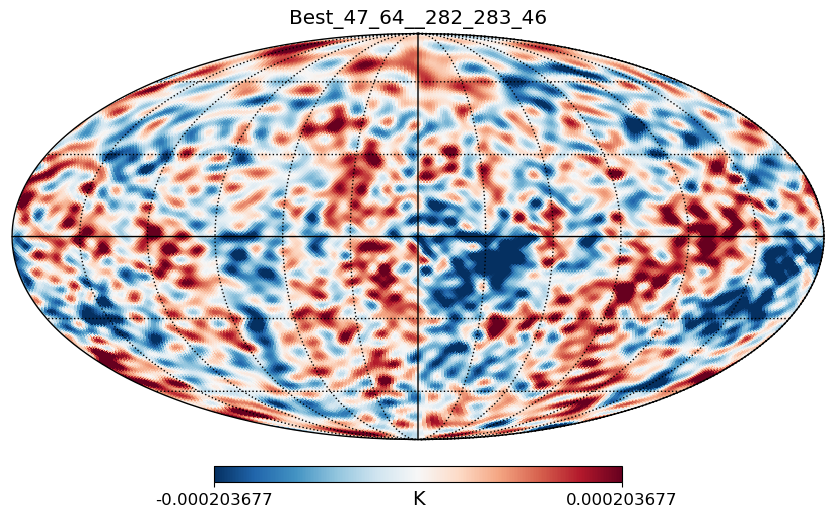

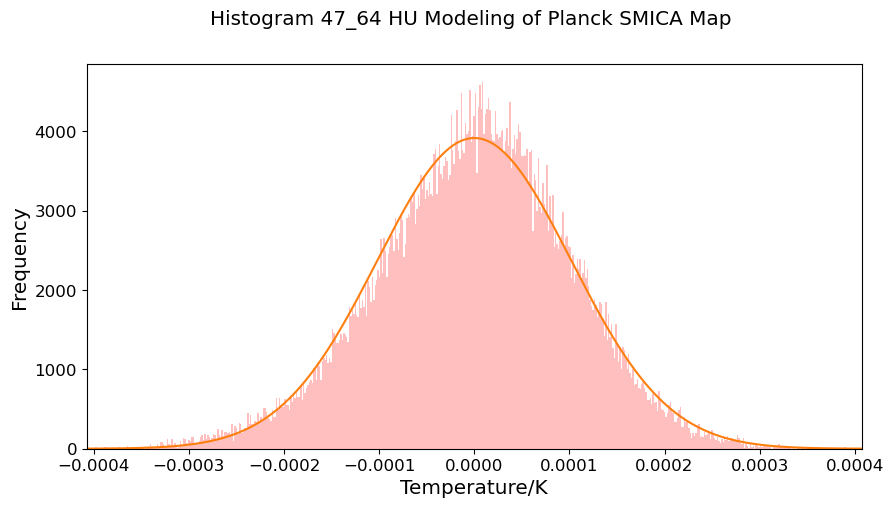

4.92463563 4.95336686 0.8165214728204138 -3.3918425509593204 Best_47_64__282_283_46


In [3]:
if Color.EVALUATE_DF_AT_POSITION in todo:
    (lk, ll, lm) = x0
    y0 = [np.round((xx+1) / np.pi * 180, 2) for xx in x0]
    print("evaluated at {}".format(y0))
    # Create karray
    # karray = list(np.arange(2, 49))
    # karray = list(np.arange(2, 10))

    # karray = list(np.arange(20, 80, 20))
    karray = list(np.arange(2,48))
    karray = np.array(sorted(list(set(karray)))).astype(int)
    print(len(karray))
    kmax = max(karray)
    nside3D = 64
    bandwidth = 64
    #################################
    myHyper = HYPER(nside3D, sigma_smica, planck_IQU_SMICA, karray,
                    lk, ll, lm, loadpriorG=False, savePG=False, bandwidth=bandwidth, longG=False)
    #################################################################
    results, newmap0, err = myHyper.project4D3d_0(karray)
    filename = "./img1/SingleBest_{}_{}__{}_{}_{}.png".format(kmax, nside3D, chg2ang(lk),
                                                              chg2ang(ll), chg2ang(lm))
    title = "Best_{}_{}__{}_{}_{}".format(kmax, nside3D, chg2ang(lk),
                                          chg2ang(ll), chg2ang(lm))

    myHyper.plotNewMap(newmap0, err, filename=filename, title=title, plotme=True, save=True)
    myHyper.plotHistogram(newmap0.squeeze(), nside3D, kmax, plotme=True)
    print(lk, ll, lm, err, title)
    df = pd.DataFrame(np.concatenate([results, myHyper.df[:, 0:4]], axis=1),
                      columns=["coeff", "k", "l", "m", "std"])
    filename = "./PG_data/spectrum_{}_{}__{}_{}_{}".format(kmax, nside3D, chg2ang(lk), chg2ang(ll), chg2ang(lm))
    df.to_pickle(filename)
    #################################################################
    #################################################################
    #################################################################

In [ ]:
### Find Neighborhood
if Color.FINDNEIGHBORHOOD in todo:
    # these three indices are related to position within the hyperspherical hypersurface. 
    # Don't confuse them with the
    # quantum numbers k,l,m
    x0 = [4.92463563, 4.95336686, 0.8165214728204138] #[339.46, 341.1, 104.08]
    (lambda_k0, lambda_l0, lambda_m0) = x0
    # Create karray
    nside3D = 48
    bandwidth = 64
    karray = list(np.arange(2, 9))
    print(len(karray))
    kmax = max(karray)
    #################################
#     myHyper = HYPER(nside3D, sigma_smica, planck_IQU_SMICA, karray,
#                         lambda_k0, lambda_l0, lambda_m0, loadpriorG=False, savePG=False, bandwidth=bandwidth)

    # ################################################################
    # these three indices are related to position within the hyperspherical hypersurface.  
    # Don't confuse them with the
    # quantum numbers k,l,m
    errarray = []
    olderr = 1110.0
    results = 0.0
    x00 = []
    nside3D = 48
    bandwidth = 48
    n = 7
    myHyper.change_SMICA_resolution(nside3D, doit=False, bandwidth=bandwidth)
    for lk in np.linspace(lambda_k0, 2 * np.pi+lambda_k0, n):
        for ll in np.linspace(lambda_l0, 2 * np.pi+lambda_l0, n):
            for lm in np.linspace(lambda_m0, 2 * np.pi+lambda_m0, n):
                start_time = time()
                try:
                    myHyper.change_HSH_center(lk, ll, lm, karray, nside3D, loadpriorG=False, doit=True,
                                              savePG=False)
                    results, fcolors, err = myHyper.project4D3d_0(karray)
                    myHyper.plotNewMap(fcolors, err, filename=None, title=None, plotme=False, save=True)
                    if olderr > err:
                        olderr = err
                        err0 = np.round(err, 3)
                        filename = "./img1/Bestf_{}_{}_{}__{}_{}_{}.png".format(myHyper.kmax, myHyper.nside3D,
                                                                                err0,
                                                                                chg2ang(lk),
                                                                                chg2ang(ll),
                                                                                chg2ang(lm))
                        myHyper.plotNewMap(fcolors, err, filename=filename, title=None, plotme=True, save=True)
                        x00.append((lk, ll, lm, err))
                        np.save("./img1/x0_{}_{}.npy".format(kmax, nside3D), x00[-1:], allow_pickle=True)
                        print(lk, ll, lm, err)
                except Exception as aa:
                    print('Error with getting map for: {}_{}_{}'.format(lk, ll, lm))
                stop_time = time()
    myHyper.creategiff(kmax, nside3D, mypath="./img1/", prefix="aitoff", filename="BEST")
    sleep(10)
    myHyper.cleanup(mypath="./img1", prefix="aitoff")
    myHyper.cleanup(mypath="./img1", prefix="Bestf")
    print("Best Position = ", x00[-1:])
    bestposition = "./img1/x0_{}_{}.npy".format(kmax, nside3D)
    np.save("./img1/x0_{}_{}.npy".format(kmax, nside3D), x00[-1:][0], allow_pickle=True)
    np.save("./img1/x00_{}_{}.npy".format(kmax, nside3D), x00, allow_pickle=True)
#################################################################
# Best Position =  [(8.066228283589794, 4.95336686, 7.09970678, -0.9718546564810226)]
# Best Position =  [(8.066228283589794, 4.95336686, 7.09970678, -0.9718546564810226)]
x0 = [x%(2*np.pi) for x in x00[-1:][0][0:3]]

In [ ]:
if Color.MINIMIZEPOSITION in todo:
    # Best Position = [(2.0943951023931953, 4.886921905584122, 4.886921905584122, -0.9543073989083581)]
    # x0= x00[-1:][0][0:3]
    # x0 = (2.0943951023931953, 4.886921905584122, 4.886921905584122)
    # x0 = [2.11999902, 4.84227338, 4.95303838]  # ksi, theta, phi = [121.47, 277.44, 283.79]
    # x0 = [2.0943951023931953, 5.235987755982988, 4.1887902047863905] # -0.9512365749096219 June 09
    # x0 = [2.13302707, 5.08554078, 4.34175881]  # -0.958704 [122.21, 291.38, 241.71] June9 Minimized
    # x0 = [4.92463563, 4.95336686, 0.8165214728204138]
    # x0 = [4.82349567, 4.88348719, 0.84566045] #- 3.3740886193323982  696721
    x0 = [4.82349567, 4.88348719, 0.84566045] #-3.442960596169308 9876
#     x0 =  [x%(2*np.pi) for x in x00[-1:][0][0:3]]
    y0 = [np.round((xx+1) / np.pi * 180, 2) for xx in x0]
    print("evaluated at {}".format(y0))
    nside3D = 48
    bandwidth = 64
    (lambda_k, lambda_l, lambda_m) = x0
    # Create karray
    karray = list(np.arange(2, 20))
    print(len(karray))
    kmax = max(karray)
    #################################
    myHyper = HYPER(nside3D, sigma_smica, planck_IQU_SMICA, karray,
                        lambda_k, lambda_l, lambda_m, loadpriorG=False, savePG=False, bandwidth=bandwidth)
    #################################
    print(x0)
    x0 = minimize(myHyper.calcError, x0, args=(karray, nside3D), method='nelder-mead',
                  options={'xatol': 1e-4, 'disp': True})
    np.save("./img1/x0_{}_{}.npy".format(kmax, nside3D), x0.x, allow_pickle=True)
    x0 = x0.x
    (lk, ll, lm) = x0
    print("minimized at {}".format(x0))
    filename = "./img1/Best_{}_{}__{}_{}_{}.png".format(kmax, nside3D, chg2ang(lk), chg2ang(ll), chg2ang(lm))
    title = "Best_{}_{}__{}_{}_{}".format(kmax, nside3D, chg2ang(lk), chg2ang(ll), chg2ang(lm))
    myHyper.change_HSH_center(lk, ll, lm, karray, nside3D, loadpriorG=False, doit=True, savePG=True)
    results, newmap, err = myHyper.project4D3d_0(karray)
    np.save("./img1/results_{}_{}.npy".format(kmax, nside3D), results, allow_pickle=True)
#################################################################


In [20]:
np.shape(newmap0.squeeze()), np.shape(fcolors.squeeze()), np.shape(myHyper.SMICA.squeeze())

((49152,), (12582912,), (12582912,))

In [23]:

import healpy as hp
nside3D = 64
bandwidth = 64
SMICA_alms = hp.sphtfunc.map2alm(newmap0, lmax=bandwidth)
nside3D = 256
bandwidth = 3000
fcolors = hp.alm2map(SMICA_alms, nside=nside3D)
(mu, sigma) = norm.fit(fcolors)
if sigma != 0.0:
    fcolors = (fcolors - mu) / sigma * myHyper.sigma_smica
fcolors = np.expand_dims(fcolors, axis=1).squeeze()
diffmap=fcolors - myHyper.SMICA
myHyper.plot_aitoff(diffmap, kk=0, ll=0, mm=0, err=0, filename="", title="", save=False,
                 plotme=True)

ValueError: operands could not be broadcast together with shapes (786432,) (12582912,) 

In [8]:

myHyper.plot_aitoff(fcolors, kk=0, ll=0, mm=0, err=0, filename="", title="", save=False,
                 plotme=True)

array([-0.02130697+0.j,  0.01285355+0.j, -0.23466153+0.j,  0.09379426+0.j,
       -0.28071294+0.j, -0.23988801+0.j, -0.0799974 +0.j,  0.06128492+0.j,
        0.01655237+0.j,  0.02249408+0.j])

In [ ]:
newmap.shape()

0.0 180.0 -180.0 180.0


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

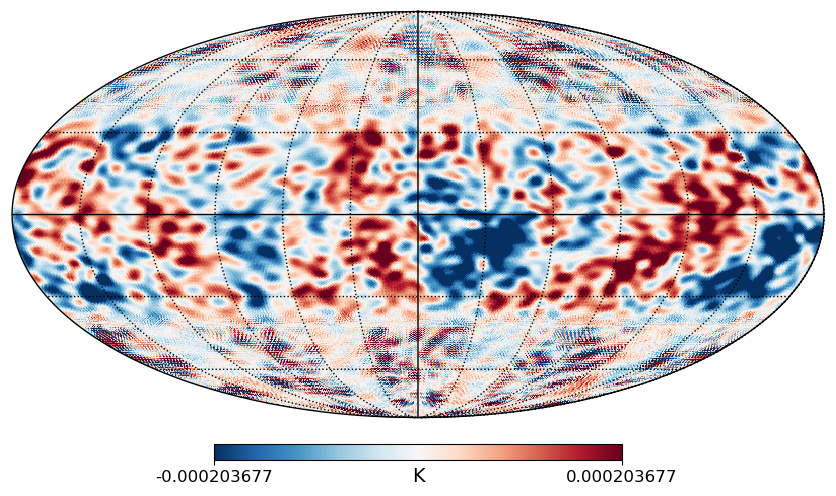

In [11]:
fcolors = hp.alm2map(SMICA_alms, nside=nside3D)
(mu, sigma) = norm.fit(fcolors)
if sigma != 0.0:
    fcolors = (fcolors - mu) / sigma * myHyper.sigma_smica
fcolors = np.expand_dims(fcolors, axis=1)
myHyper.plot_aitoff(fcolors.squeeze(), kk=0, ll=0, mm=0, err=0, filename="", title="", save=False,
                 plotme=True)
        


In [ ]:
hiresolutionNewMap = myHyper.change_resolution(newmap0, nside3D=64, filename="diffmap.pgn",
                          title="Difference Map", save=True, plotme=True, bandwidth=3000)
np.shape(hiresolutionNewMap )

In [ ]:
if Color.OPTIMIZE_SPECTRUM in todo:
    (lk, ll, lm) = x0
    # Create karray
    karray = list(np.arange(20, 222, 20))
    karray = np.array(sorted(list(set(karray)))).astype(int)
    print(len(karray))
    kmax = max(karray)
    nside3D = 128
    bandwidth = 1024
    myHyper = None
    myHyper = HYPER(nside3D, sigma_smica, planck_IQU_SMICA, karray,
                    lk, ll, lm, loadpriorG=True, savePG=True, bandwidth=bandwidth, longG=True)
    
#     subtract from SMICA the background
    hiresolutionNewMap = myHyper.change_resolution(newmap0, nside3D=nside3D, filename="diffmap.pgn",
                          title="Difference Map", save=True, plotme=True, bandwidth=bandwidth)
#     SMICA_LR_NO_BG = myHyper.SMICA_LR.squeeze() - diffmap.squeeze()
    
##################################################################
#     myHyper.SMICA_LR = np.load("./img1/diffmap.npy").T
#     myHyper.plotNewMap(myHyper.SMICA_LR, 0, filename=None, title="DiffMap", plotme=True, save=False, nosigma=False)
#     results, newmap, err = myHyper.project4D3d_0(karray)
#     # #################################
#     myHyper.plot_Single_CL_From_Image(newmap, nside3D, xmax=50,log=True)
#     myHyper.plot_Single_CL_From_Image(diffmap, nside3D, xmax=300)
#     myHyper.plot_CL_From_Image(newmap, nside3D, planck_theory_cl, xmax=300, ymax=0)

#     newnewmap = myHyper.SMICA_LR.squeeze() - xx0[1] * newmap.squeeze() + xx0[0]

#     myHyper.plot_CL_From_Image(diffmap, nside3D, planck_theory_cl, xmax=300, ymax=0.1)

#     myHyper.plot_CL_From_Image(myHyper.SMICA_LR.squeeze(), nside3D, planck_theory_cl, xmax=3000, ymax=1)
#     df = pd.DataFrame(np.concatenate([results, myHyper.df[:, 0:4]], axis=1),
#                       columns=["coeff", "k", "l", "m", "std"])
#     filename = "./PG_data/spectrumOptimum_{}_{}__{}_{}_{}".format(kmax, nside3D, chg2ang(lk), chg2ang(ll),
#                                                                   chg2ang(lm))
#     df.to_pickle(filename)

#     # subtract from SMICA the background
#     SMICA_LR_NO_BG = myHyper.SMICA_LR.squeeze() - diffmap.squeeze()
#     myHyper.plot_ONLY_CL_From_Image(newmap, nside3D, SMICA_LR_NO_BG, nsidesmica=nside3D, xmax=200)

#     df["CL"] = df["coeff"] ** 2
#     df["abscoeff"] = df.coeff.abs()

#     fcolors = df.coeff.values
#     (mu, sigma) = norm.fit(fcolors)
#     n, bins, patch = plt.hist(fcolors, 600, density=1, facecolor="r", alpha=0.25)
#     y = norm.pdf(bins, mu, sigma)
#     plt.plot(bins, y)
#     plt.xlim(mu - 4 * sigma, mu + 4 * sigma)
#     plt.xlabel("Amplitude")
#     plt.ylabel("Frequency")
#     plt.ylim(0, 0.04)
#     plt.title("Amplitude Histogram \n HU Modeling of Planck SMICA Map")
#     plt.savefig("./PG_data/AmplitudeHistogram_{}_{}.png", dpi=300)
#     plt.show()

#     numberofmodes = df.groupby(['k'])["abscoeff"].count()
#     meanAmplitude = df.groupby(['k'])["abscoeff"].mean()
#     meanEnergy = meanAmplitude ** 2 * meanAmplitude.index * numberofmodes
#     stdd = df.groupby(['k'])["abscoeff"].std()
#     one = np.ones(stdd.shape)
#     valueOfK = stdd.index.values

#     # calculation of Predicted Amplitudes
#     predictedAmp = 75 / np.sqrt(valueOfK)
#     # low pass filtering
#     predictedAmp = np.exp(-0.01 * (valueOfK - 2)) * predictedAmp
#     # Frequency dependent freezing phase accounting
#     delta = 0.01
#     predictedAmp = sinxx(valueOfK * delta) * predictedAmp
#     plt.plot(numberofmodes, predictedAmp)
#     plt.scatter(numberofmodes, meanAmplitude)
#     plt.title("Predicted and Observed Mean Amplitudes \n under Energy Equipartition per mode k")
#     plt.xlabel("Accessible Modes for given k")
#     plt.ylabel("Hyperspherical Mode Amplitude per k")
#     plt.ylim(0, 25)
#     plt.xlim(0, 250)
#     plt.savefig("./PG_data/PredicedtAmp.png", dpi=300)
#     plt.show()

#     plt.plot(numberofmodes, meanEnergy)
#     plt.title("Mean Energy per k")
#     plt.xlabel("Accessible Modes for given k")
#     plt.ylabel("Mean Energy per k \n arbitrary units")
#     plt.xlim(0, 250)
#     plt.ylim(0, 4.5E5)
#     plt.savefig("./PG_data/MeanEnergy.png", dpi=300)
#     plt.show()

#     plt.scatter(numberofmodes, meanAmplitude)
#     plt.title("Mean Amplitude per k")
#     plt.xlabel("Accessible Modes for given k")
#     plt.ylabel("Mean Amplitude per k")
#     plt.ylim(0, 22.5)
#     plt.xlim(0, 250)
#     plt.savefig("./PG_data/MeanAmp.png", dpi=300)
#     plt.show()

#     plt.scatter(numberofmodes, stdd)
#     plt.title("STD")
#     plt.xlabel("Accessible Modes for given k")
#     plt.ylabel("STD")
#     plt.xlim(0, 250)
#     plt.savefig("./PG_data/STD.png", dpi=300)
#     plt.show()

#     plt.plot(numberofmodes, meanAmplitude / stdd)
#     plt.plot(numberofmodes, np.mean((meanAmplitude / stdd)[3:]) * one)
#     plt.title("MeanAmplitude/std")
#     plt.xlabel("Accessible Modes for given k")
#     plt.ylabel("MeanAmplitude/std")
#     plt.xlim(0, 250)
#     plt.ylim(0, 2)
#     plt.savefig("./PG_data/PredicedtAmpPerSTD.png", dpi=300)
#     plt.show()
#     ################################################################
#     ################################################################
#     ################################################################
#     ################################################################
#     ################################################################
#     ################################################################
#     #################################################################


In [ ]:
hiresolutionNewMap = myHyper.change_resolution(newmap0, nside3D=nside3D, filename="diffmap.pgn",
                          title="Difference Map", save=True, plotme=True, bandwidth=bandwidth)

In [ ]:
if 1==1:
# #################################
    myHyper.plot_Single_CL_From_Image(newmap, nside3D, xmax=50,log=True)
    myHyper.plot_Single_CL_From_Image(diffmap, nside3D, xmax=300)
    myHyper.plot_CL_From_Image(newmap, nside3D, planck_theory_cl, xmax=300, ymax=0)

    newnewmap = myHyper.SMICA_LR.squeeze() - xx0[1] * newmap.squeeze() + xx0[0]

    myHyper.plot_CL_From_Image(diffmap, nside3D, planck_theory_cl, xmax=300, ymax=0.1)

    myHyper.plot_CL_From_Image(myHyper.SMICA_LR.squeeze(), nside3D, planck_theory_cl, xmax=3000, ymax=1)
    df = pd.DataFrame(np.concatenate([results, myHyper.df[:, 0:4]], axis=1),
                      columns=["coeff", "k", "l", "m", "std"])
    filename = "./PG_data/spectrumOptimum_{}_{}__{}_{}_{}".format(kmax, nside3D, chg2ang(lk), chg2ang(ll),
                                                                  chg2ang(lm))
    df.to_pickle(filename)

    # subtract from SMICA the background
    SMICA_LR_NO_BG = myHyper.SMICA_LR.squeeze() - diffmap.squeeze()
    myHyper.plot_ONLY_CL_From_Image(newmap, nside3D, SMICA_LR_NO_BG, nsidesmica=nside3D, xmax=200)

    df["CL"] = df["coeff"] ** 2
    df["abscoeff"] = df.coeff.abs()

    fcolors = df.coeff.values
    (mu, sigma) = norm.fit(fcolors)
    n, bins, patch = plt.hist(fcolors, 600, density=1, facecolor="r", alpha=0.25)
    y = norm.pdf(bins, mu, sigma)
    plt.plot(bins, y)
    plt.xlim(mu - 4 * sigma, mu + 4 * sigma)
    plt.xlabel("Amplitude")
    plt.ylabel("Frequency")
    plt.ylim(0, 0.04)
    plt.title("Amplitude Histogram \n HU Modeling of Planck SMICA Map")
    plt.savefig("./PG_data/AmplitudeHistogram_{}_{}.png", dpi=300)
    plt.show()

    numberofmodes = df.groupby(['k'])["abscoeff"].count()
    meanAmplitude = df.groupby(['k'])["abscoeff"].mean()
    meanEnergy = meanAmplitude ** 2 * meanAmplitude.index * numberofmodes
    stdd = df.groupby(['k'])["abscoeff"].std()
    one = np.ones(stdd.shape)
    valueOfK = stdd.index.values

    # calculation of Predicted Amplitudes
    predictedAmp = 75 / np.sqrt(valueOfK)
    # low pass filtering
    predictedAmp = np.exp(-0.01 * (valueOfK - 2)) * predictedAmp
    # Frequency dependent freezing phase accounting
    delta = 0.01
    predictedAmp = sinxx(valueOfK * delta) * predictedAmp
    plt.plot(numberofmodes, predictedAmp)
    plt.scatter(numberofmodes, meanAmplitude)
    plt.title("Predicted and Observed Mean Amplitudes \n under Energy Equipartition per mode k")
    plt.xlabel("Accessible Modes for given k")
    plt.ylabel("Hyperspherical Mode Amplitude per k")
    plt.ylim(0, 25)
    plt.xlim(0, 250)
    plt.savefig("./PG_data/PredicedtAmp.png", dpi=300)
    plt.show()

    plt.plot(numberofmodes, meanEnergy)
    plt.title("Mean Energy per k")
    plt.xlabel("Accessible Modes for given k")
    plt.ylabel("Mean Energy per k \n arbitrary units")
    plt.xlim(0, 250)
    plt.ylim(0, 4.5E5)
    plt.savefig("./PG_data/MeanEnergy.png", dpi=300)
    plt.show()

    plt.scatter(numberofmodes, meanAmplitude)
    plt.title("Mean Amplitude per k")
    plt.xlabel("Accessible Modes for given k")
    plt.ylabel("Mean Amplitude per k")
    plt.ylim(0, 22.5)
    plt.xlim(0, 250)
    plt.savefig("./PG_data/MeanAmp.png", dpi=300)
    plt.show()

    plt.scatter(numberofmodes, stdd)
    plt.title("STD")
    plt.xlabel("Accessible Modes for given k")
    plt.ylabel("STD")
    plt.xlim(0, 250)
    plt.savefig("./PG_data/STD.png", dpi=300)
    plt.show()

    plt.plot(numberofmodes, meanAmplitude / stdd)
    plt.plot(numberofmodes, np.mean((meanAmplitude / stdd)[3:]) * one)
    plt.title("MeanAmplitude/std")
    plt.xlabel("Accessible Modes for given k")
    plt.ylabel("MeanAmplitude/std")
    plt.xlim(0, 250)
    plt.ylim(0, 2)
    plt.savefig("./PG_data/PredicedtAmpPerSTD.png", dpi=300)
    plt.show()
    ################################################################
    ################################################################
    ################################################################
    ################################################################
    ################################################################
    ################################################################
    #################################################################

In [ ]:
myHyper.plot_Single_CL_From_Image(newmap, nside3D, xmax=50,log=True)
myHyper.plot_Single_CL_From_Image(diffmap, nside3D, xmax=300)
myHyper.plot_CL_From_Image(newmap, nside3D, planck_theory_cl, xmax=300, ymax=0)

In [ ]:
if Color.FINDBESTFORKRANGE in todo:
    # myHyper.phi, myHyper.theta, myHyper.ksi = hp.pix2vec(nside=nside3D, ipix=np.arange(hp.nside2npix(nside=nside3D)))
    # myHyper.theta, myHyper.phi = hp.pix2ang(nside=nside3D,
    #                                                      ipix=np.arange(hp.nside2npix(nside=nside3D)))
    # myHyper.costheta = np.cos(myHyper.theta)
    # k = 9
    # l = 3
    # for m in np.arange(-l+1,l):
    #     pp = np.array([legendre(l, x) for x in myHyper.costheta])
    #     myHyper.plot_aitoff_df(l,m,myHyper.phi, pp=pp)
    #
    # x0=np.load("./img1/x0_{}_{}.npy".format(kmax, nside3D), allow_pickle=True)
    # x00 = np.load("./img1/x00_{}_{}.npy".format(kmax, nside3D), allow_pickle=True)
    # x0 = np.load("./img1/results_{}_{}.npy".format(kmax, nside3D), allow_pickle=True)
    # x0 = [5.45066325E+00, 1.36266581E+00, -2.65625000E-04]
    (lk, ll, lm) = x0
    myHyper.change_SMICA_resolution(nside3D, myHyper.sigma_smica, bandwidth=bandwidth)
    olderr = 1110.0

    for kk in [x for x in karray if x > 10]:
        print(kk)
        kkarray = [x for x in karray if x <= kk + 1]
        kmax = np.max(kkarray)
        results, newmap, err, packedresults = myHyper.project4D3d_0(kkarray)
        print(lk, ll, lm, err, "intermediate result")
        if err < olderr:
            olderr = err
            filename = "./img1/Best_{}_{}__{}_{}_{}_{}.png".format(kmax, nside3D, np.round(lk, 1),
                                                                   np.round(ll, 1), np.round(lm, 1),
                                                                   np.round(err * 1, 4))
            title = "Best_{}_{}__{}_{}_{}_{}".format(kmax, nside3D, np.round(lk, 1),
                                                     np.round(ll, 1), np.round(lm, 1),
                                                     np.round(err * 1, 4))
            myHyper.plotNewMap(newmap, err, filename=filename, title=title, plotme=True, save=True)
            print(lk, ll, lm, err, title)
            filenameResults = "./PG_data/Results_{}_{}__{}_{}_{}_{}.npy".format(kmax, nside3D, np.round(lk, 1),
                                                                                np.round(ll, 1),
                                                                                np.round(lm, 1),
                                                                                np.round(err * 1, 4))
            np.save(filenameResults, packedresults)
            np.save("./PG_data/resultsBest_{}_{}.npy".format(kmax, nside3D), results, allow_pickle=True)
            myHyper.plotHistogram(newmap.squeeze(), nside3D, kmax, plotme=True)
            myHyper.plotNewMap(newmap, err, filename=filename, title=title, plotme=True, save=False)
    # dl_SMICA, dl_SMICA_HU, ell = myHyper.plot_ONLY_CL_From_Image(newmap.squeeze(), bandwidth, xmax=10 * kmax)


In [ ]:
if Color.CREATE_GAUSSIAN_BACKGROUND in todo:
    nside3D = 128  # 128
    bandwidth = 3000
    filename = "./img1/3DGaussianNoise_{}_{}.png".format(kmax, nside3D)
    title = "3DGaussianNoise_{}_{}".format(kmax, nside3D)
    (lambda_k, lambda_l, lambda_m) = x0
    # Create karray
    karray = list(np.arange(2, 50))
    # kmax=1
    # karray += sorted(list(set([int(k) for k in np.geomspace(11,kmax,30)])))
    print(len(karray))
    kmax = max(karray)
    #################################
    myHyper = HYPER(nside3D, sigma_smica, planck_IQU_SMICA, karray,
                    lambda_k, lambda_l, lambda_m, loadpriorG=True, savePG=True)
    #################################################################
    delta = 0.001
    lmax = 1000
    llist = sorted(list(set([int(k) for k in np.geomspace(1, lmax + 1, 100)])))
    wavefunction = myHyper.createGaussianBackground(x0, nside3D, delta, karray=llist)
    wavefunction = myHyper.normalizeFColors(wavefunction, myHyper.sigma_smica).squeeze()
    myHyper.plotNewMap(wavefunction, 0, filename=filename, title=title, plotme=True, save=True)
    myHyper.plot_CL_From_Image(wavefunction, nside3D, planck_theory_cl, xmax=2 * lmax, ymax=0.01)
    myHyper.plot_ONLY_CL_From_Image(wavefunction, nside3D, myHyper.SMICA, nsidesmica=1024, xmax=2 * lmax)
    np.save("./PG_data/3DGaussianNoise_{}_{}.npy".format(kmax, nside3D), wavefunction, allow_pickle=True)
###############################################################
